In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
import pandas as pd
df_train = pd.read_csv('C:/Data Science/Mobile Price Classification/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [36]:
df_train.describe

<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

In [37]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

In [38]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [39]:
import pandas as pd
df_test = pd.read_csv('C:/Data Science/Mobile Price Classification/test.csv')
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [41]:
df_test.describe

<bound method NDFrame.describe of        id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          

In [42]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [43]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [44]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [45]:
x = df_train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

y = df_train['price_range']

In [46]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [48]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn_model.predict(x_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.89      0.91      0.90        92
           3       0.97      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [51]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [52]:
df_test= df_test[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]



In [53]:
real_y = knn_model.predict(df_test)

<Axes: ylabel='Count'>

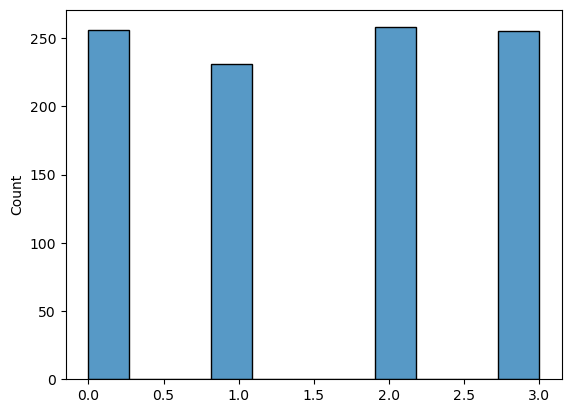

In [54]:
import seaborn as sns
sns.histplot(real_y)

In [55]:
real_y# Convert the NumPy array to a Pandas Series
pandas_series = pd.Series(real_y)

# Now, you can use value_counts() on the Pandas Series
counts = pandas_series.value_counts()

print(counts)

2    258
0    256
3    255
1    231
Name: count, dtype: int64


In [56]:
l =list(real_y)

In [57]:
print(l.count(0))
print(l.count(1))
print(l.count(2))

256
231
258


In [58]:
#Gaussian Naive Bayes (GaussianNB) — a simple and fast machine learning algorithm — to predict mobile price range from the data.

In [59]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [60]:
import pandas as pd
df_train = pd.read_csv('C:/Data Science/Mobile Price Classification/train.csv')
df_train
df_test = pd.read_csv('C:/Data Science/Mobile Price Classification/test.csv')
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [61]:
#Split data
X_df_train = df_train.drop('price_range', axis=1)
y_df_train = df_train['price_range']

In [62]:
#Create and train the model
model = GaussianNB()
model.fit(X_df_train, y_df_train)

GaussianNB()

In [63]:
# Drop 'id' column from test data if it exists
if 'id' in df_test.columns:
   df_test = df_test.drop('id', axis=1)

In [64]:
#Make predictions
y_pred = model.predict(df_test)
print(y_pred)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 1 2 3 2 1 3 1 2 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 2 2 1 2 0 0 0 0 1 2 1 2 2 0 2 1 3 0 3 1 1 3 3 3 1 1 1 1 1 2 1 1 1 1 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 2 0 1 1 2 0 2 1 0 2 1 3 1 0 0 2 1 2 0 1 2 3 3
 3 1 3 3 3 3 1 3 0 0 3 2 1 1 0 3 2 3 1 0 1 1 2 3 1 1 0 3 2 1 2 2 2 3 3 3 2
 2 3 2 3 0 1 2 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 1 0 0 1 0 0 2 2 0 0 0 1 2
 2 1 1 0 0 0 0 0 3 1 0 2 1 2 3 1 2 3 3 3 1 2 1 0 1 2 2 1 2 3 3 0 2 0 3 2 2
 2 0 0 1 0 3 0 1 0 2 2 1 3 0 3 0 3 1 2 0 0 2 1 2 2 3 1 1 3 0 0 2 3 3 1 3 1
 0 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 1 2 0 0 3 2 3 2 2 1 3 2 2 3 2 2 1
 1 0 2 3 1 0 0 3 0 3 1 1 1 0 1 3 1 3 1 2 1 2 0 0 0 1 3 1 0 0 0 3 1 1 3 3 1
 3 3 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 3 3 0 1 1 3 1 3 1 3 0 0 0 0 2 0 1 1
 1 1 1 2 2 0 1 0 0 3 2 1 3 1 2 2 2 1 3 1 1 2 2 1 2 0 1 1 0 3 2 0 0 2 0 0 1
 0 0 0 0 2 2 3 2 3 0 3 1 3 0 1 1 1 2 0 3 2 3 3 1 3 1 3 1 3 2 1 2 2 2 1 0 0
 0 1 1 1 0 3 3 1 2 3 0 0 3 1 1 0 2 2 3 0 3 1 2 3 2 3 0 2 0 2 2 0 1 1 0 0 1
 1 2 3 3 3 2 3 1 1 2 2 3 

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [67]:
# Example — if your DataFrame is called train
X = df_train.drop('price_range', axis=1)
y = df_train['price_range']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [68]:
y_pred_gnb = gnb.predict(X_test)


In [69]:
from sklearn.metrics import accuracy_score

gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)


Gaussian Naive Bayes Accuracy: 0.7975


In [70]:
#That means the GNB model correctly predicted 79.75% of the test samples.

In [71]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix:\n", cm)



Confusion Matrix:
 [[95 10  0  0]
 [10 62 19  0]
 [ 0  9 71 12]
 [ 0  0 21 91]]


In [72]:
# Optional – other performance metrics
print("\nGaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gnb))



GaussianNB Accuracy: 0.7975

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.77      0.68      0.72        91
           2       0.64      0.77      0.70        92
           3       0.88      0.81      0.85       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.80      0.80       400



In [77]:
#Description:
#Gaussian Naive Bayes performs reasonably well with ~80% accuracy. 
#It’s fast and effective but less accurate than KNN since it assumes all features are independent and follow a Gaussian distribution — which might not hold true for your dataset.